In [91]:
# Imports
from env import host, user, password
import os

import numpy as np
import pandas as pd

import sklearn.preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
np.random.seed(42)

In [63]:
df = w.wrangle_zillow()

csv file found and read


In [64]:
# will need to put this into a function somewhere
dummy_df = pd.get_dummies(df[['county']], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)

In [65]:
df = df.drop(columns=['county'])

In [66]:
train, validate, test = w.split_function(df)
train.head()

Prepared df: (2033172, 8)

Train: (1219902, 8)
Validate: (406635, 8)
Test: (406635, 8)


,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,county_Orange,county_Ventura
789918,2,1,777,350556,1946,4230,0,0
1696225,2,1,1014,192599,1938,2567,0,0
1720742,3,2,1762,480000,1958,5566,1,0
962447,1,1,616,131512,1952,1694,0,0
324076,3,2,1495,84031,1954,1064,0,0


In [67]:
# make X dataframes by dropping target (tax_value)
target = 'tax_value'
X_train = train[train.columns[train.columns != target]]
X_validate = validate[validate.columns[validate.columns != target]]
X_test = test[test.columns[test.columns != target]]

In [68]:
X_train.head()

,bedrooms,bathrooms,square_feet,year_built,tax_amount,county_Orange,county_Ventura
789918,2,1,777,1946,4230,0,0
1696225,2,1,1014,1938,2567,0,0
1720742,3,2,1762,1958,5566,1,0
962447,1,1,616,1952,1694,0,0
324076,3,2,1495,1954,1064,0,0


# 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution

In [69]:
columns_to_scale = ['bedrooms', 'bathrooms', 'square_feet', 'year_built', 'tax_amount']


In [96]:
def get_minmax_scaled_X (X_train, X_validate, X_test):
    """ 
    This function will
    - accept X_train/validate/test ready for scaling
    - makes minmax scaler, fits scaler on X_train
    - returns 3 scaled dataframes; one for X_train/validate/test
    """
    # make and fit minmax scaler
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(X_train)
    
    # set columns
    cols = X_train.columns

    # initialize scaled dataframes
    X_train_scaled = pd.DataFrame(columns=cols)
    X_validate_scaled = pd.DataFrame(columns=cols)
    X_test_scaled = pd.DataFrame(columns=cols)

    X_train_scaled[cols] = scaler.transform(X_train).copy()
    X_validate_scaled[cols] = scaler.transform(X_validate).copy()
    X_test_scaled[cols] = scaler.transform(X_test).copy()
    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [97]:
X_train_scaled, X_validate_scaled, X_test_scaled = get_minmax_scaled_X (X_train[columns_to_scale],
                                                                X_validate[columns_to_scale],
                                                                X_test[columns_to_scale])

In [88]:
# visualizing original and scaled columns
def get_scaled_visuals(X_train, X_train_scaled):
    """
    This function will
    - accept X_train and a scaled X_train_scaled
    - utilize plt.hist to visualize the orginal and the scaled values
    - assumes the columns are the same in X_train and X_train_scaled
    """
    for col in X_train.columns:
        plt.figure(figsize=(13,6))

        plt.subplot(121)
        plt.hist(X_train[col])
        plt.title('Original')
        plt.xlabel(col)

        plt.subplot(122)
        plt.hist(X_train_scaled[col])
        plt.title('Scaled')
        plt.xlabel(col)

        plt.show()

## Visuals for MinMaxScaler

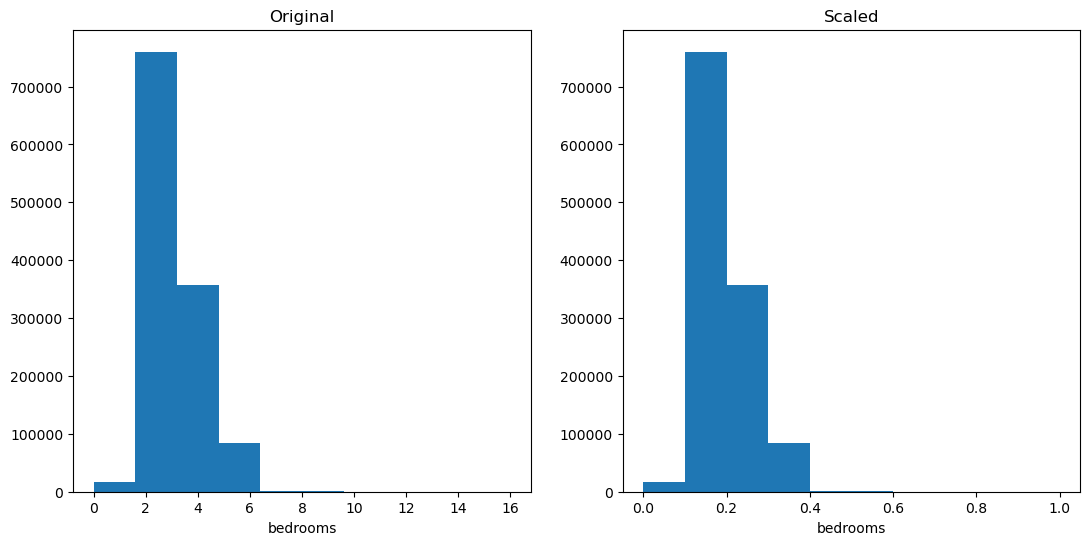

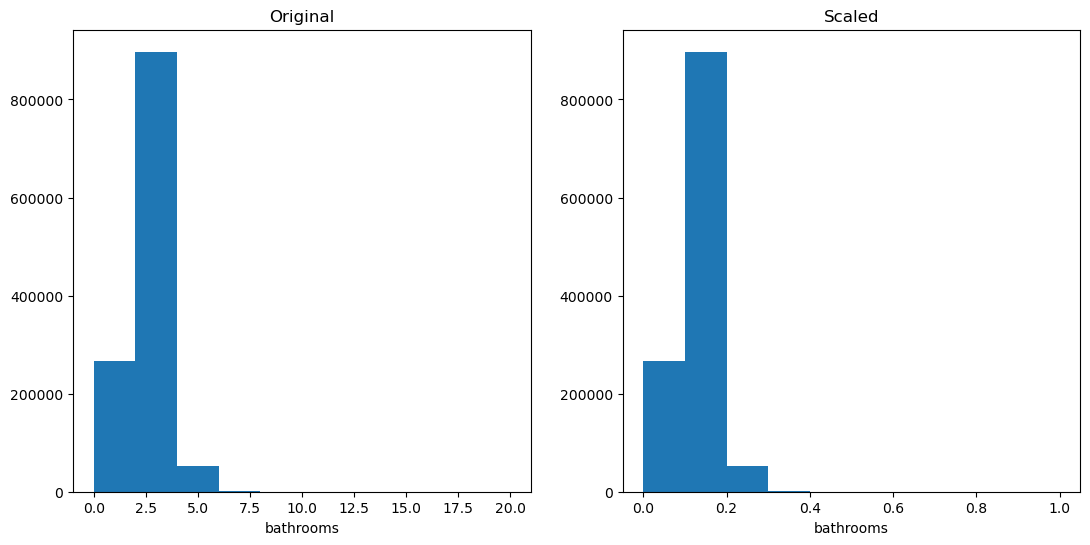

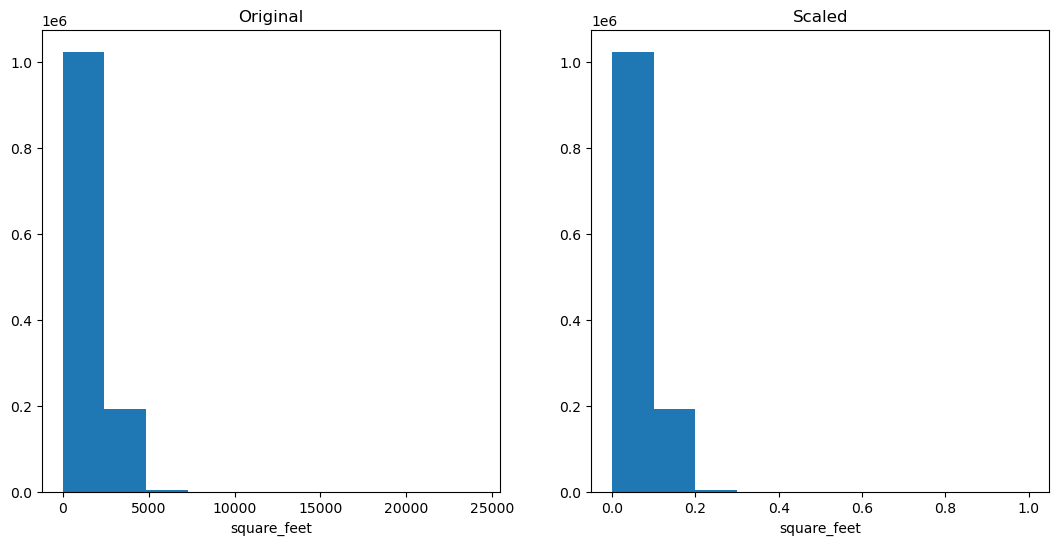

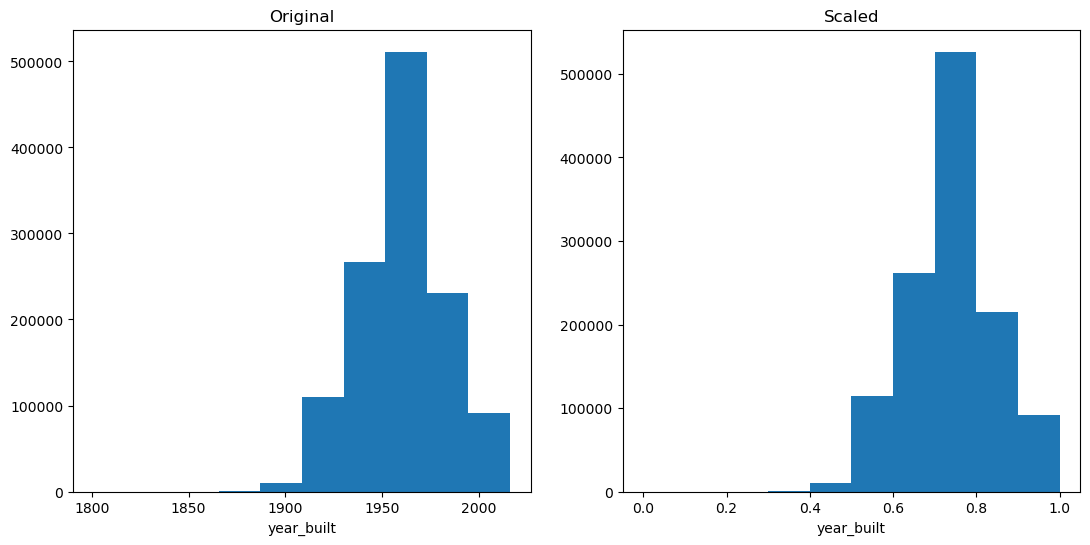

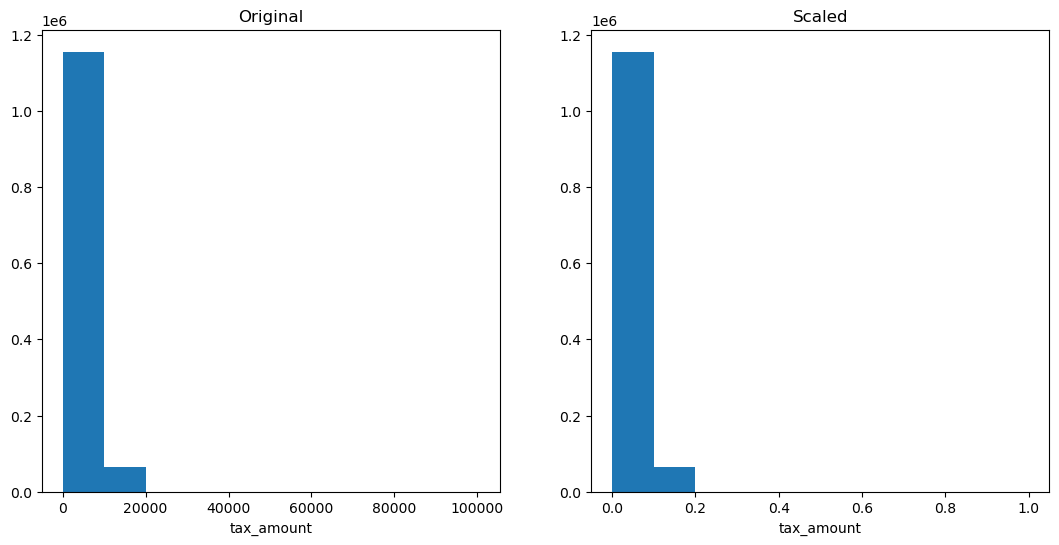

In [90]:
get_scaled_visuals(X_train[columns_to_scale], X_train_scaled)

In [94]:
def get_standard_scaled_X (X_train, X_validate, X_test):
    """ 
    This function will
    - accept X_train/validate/test ready for scaling
    - makes minmax scaler, fits scaler on X_train
    - returns 3 scaled dataframes; one for X_train/validate/test
    """
    # make and fit minmax scaler
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(X_train)
    
    # set columns
    cols = X_train.columns

    # initialize scaled dataframes
    X_train_scaled = pd.DataFrame(columns=cols)
    X_validate_scaled = pd.DataFrame(columns=cols)
    X_test_scaled = pd.DataFrame(columns=cols)

    X_train_scaled[cols] = scaler.transform(X_train).copy()
    X_validate_scaled[cols] = scaler.transform(X_validate).copy()
    X_test_scaled[cols] = scaler.transform(X_test).copy()
    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [100]:
X_train_scaled, X_validate_scaled, X_test_scaled = get_standard_scaled_X (X_train[columns_to_scale],
                                                                X_validate[columns_to_scale],
                                                                X_test[columns_to_scale])
X_train_scaled.describe()

,bedrooms,bathrooms,square_feet,year_built,tax_amount
count,1.219902e+06,1.219902e+06,1.219902e+06,1.219902e+06,1.219902e+06
mean,-1.649223e-17,2.401260e-16,-4.632948e-17,8.546095e-16,-8.819005e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.630608e+00,-2.545003e+00,-2.410598e+00,-7.393703e+00,-1.579713e+00
25%,-2.870072e-01,-1.102226e-01,-7.015711e-01,-5.233956e-01,-7.213071e-01
50%,-2.870072e-01,-1.102226e-01,-2.264590e-01,-1.056066e-01,-2.001445e-01
75%,8.275263e-01,1.107168e+00,4.882750e-01,6.371294e-01,5.028271e-01
max,1.420193e+01,2.180280e+01,3.094228e+01,2.586811e+00,3.371516e+01


## Visuals for StandardScaler

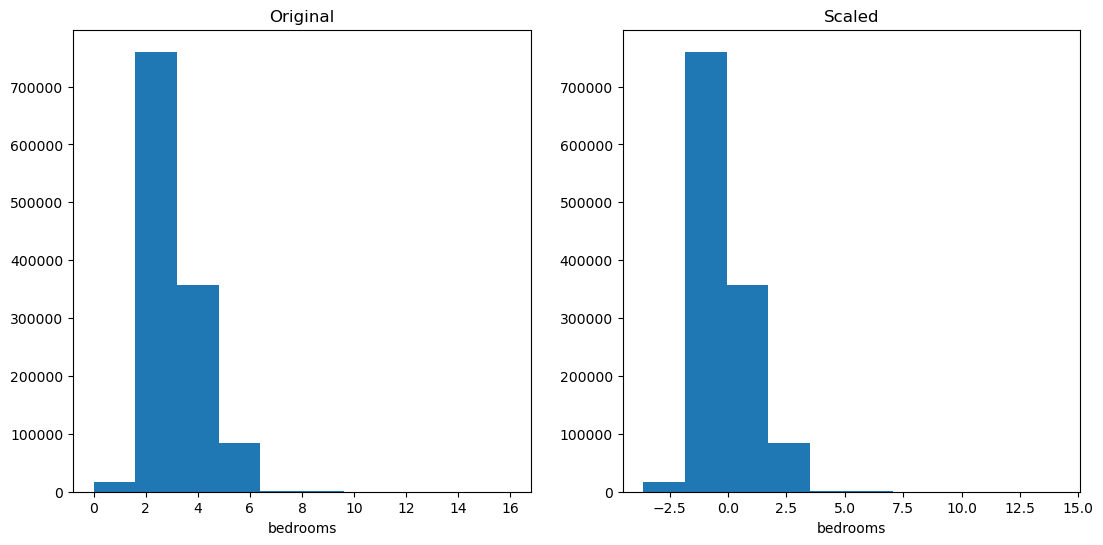

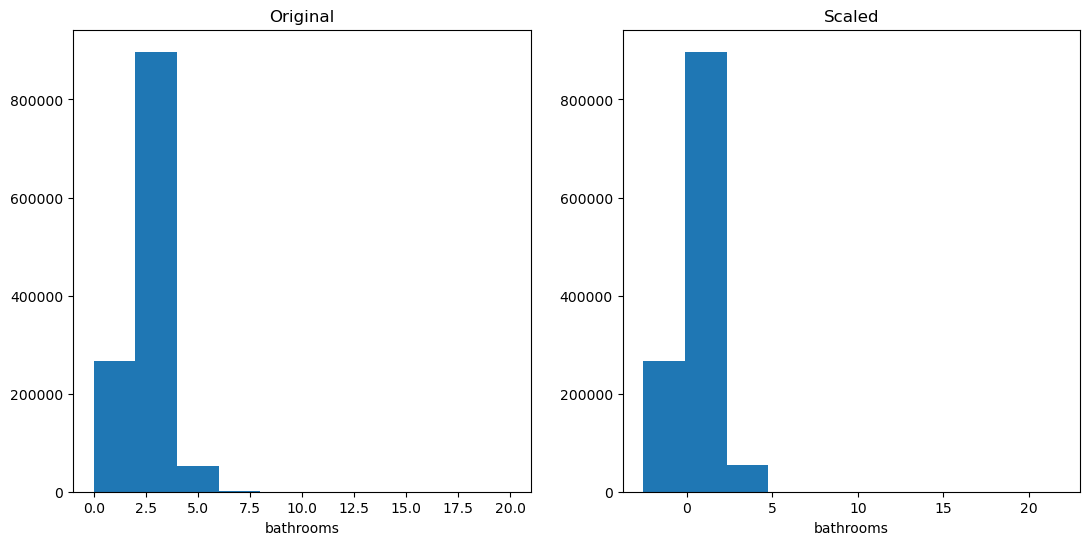

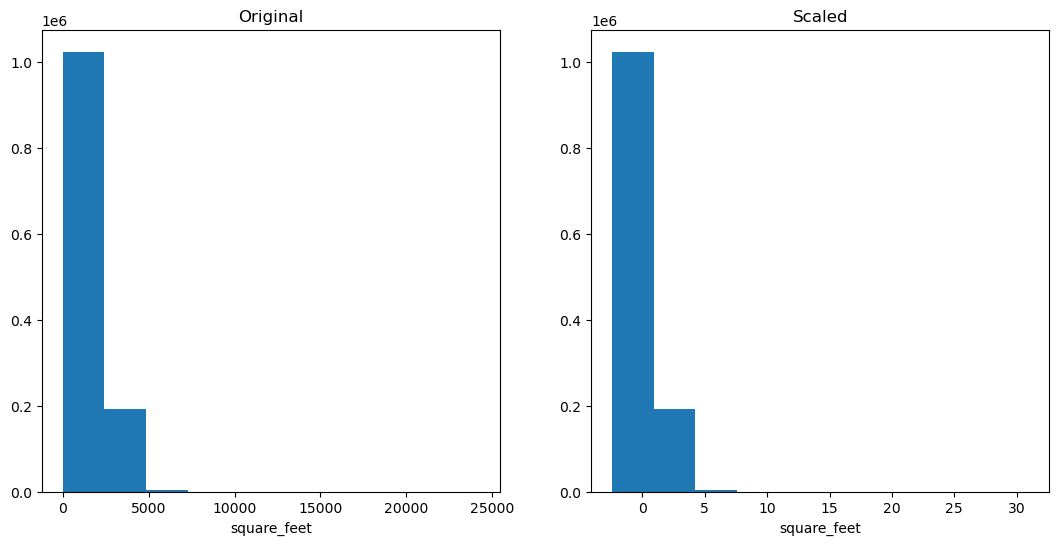

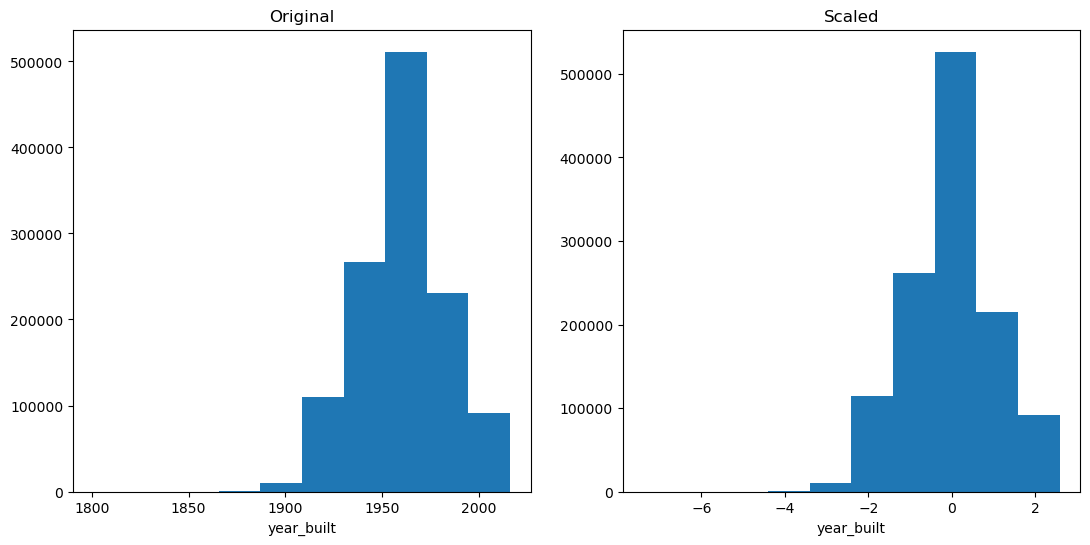

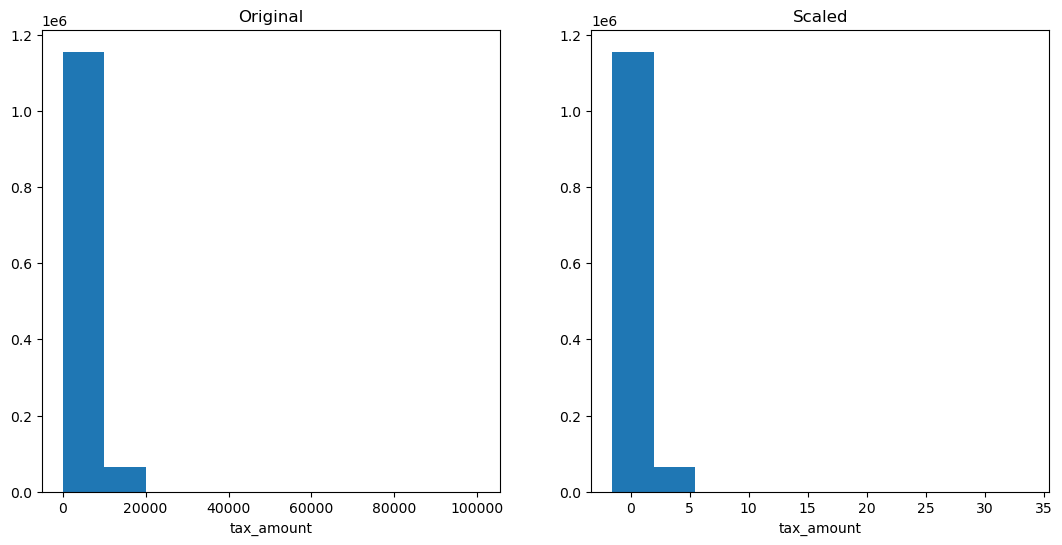

In [99]:
get_scaled_visuals(X_train[columns_to_scale], X_train_scaled)

In [101]:
def get_robust_scaled_X (X_train, X_validate, X_test):
    """ 
    This function will
    - accept X_train/validate/test ready for scaling
    - makes minmax scaler, fits scaler on X_train
    - returns 3 scaled dataframes; one for X_train/validate/test
    """
    # make and fit minmax scaler
    scaler = sklearn.preprocessing.RobustScaler()
    scaler.fit(X_train)
    
    # set columns
    cols = X_train.columns

    # initialize scaled dataframes
    X_train_scaled = pd.DataFrame(columns=cols)
    X_validate_scaled = pd.DataFrame(columns=cols)
    X_test_scaled = pd.DataFrame(columns=cols)

    X_train_scaled[cols] = scaler.transform(X_train).copy()
    X_validate_scaled[cols] = scaler.transform(X_validate).copy()
    X_test_scaled[cols] = scaler.transform(X_test).copy()
    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [102]:
X_train_scaled, X_validate_scaled, X_test_scaled = get_robust_scaled_X (X_train[columns_to_scale],
                                                                X_validate[columns_to_scale],
                                                                X_test[columns_to_scale])
X_train_scaled.describe()

,bedrooms,bathrooms,square_feet,year_built,tax_amount
count,1.219902e+06,1.219902e+06,1.219902e+06,1.219902e+06,1.219902e+06
mean,2.575133e-01,9.054006e-02,1.903263e-01,9.099895e-02,1.634988e-01
std,8.972367e-01,8.214295e-01,8.404452e-01,8.616793e-01,8.169042e-01
min,-3.000000e+00,-2.000000e+00,-1.835648e+00,-6.280000e+00,-1.126975e+00
25%,0.000000e+00,0.000000e+00,-3.993056e-01,-3.600000e-01,-4.257397e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00,6.006944e-01,6.400000e-01,5.742603e-01
max,1.300000e+01,1.800000e+01,2.619560e+01,2.320000e+00,2.770554e+01


## Visuals for RobustScaler

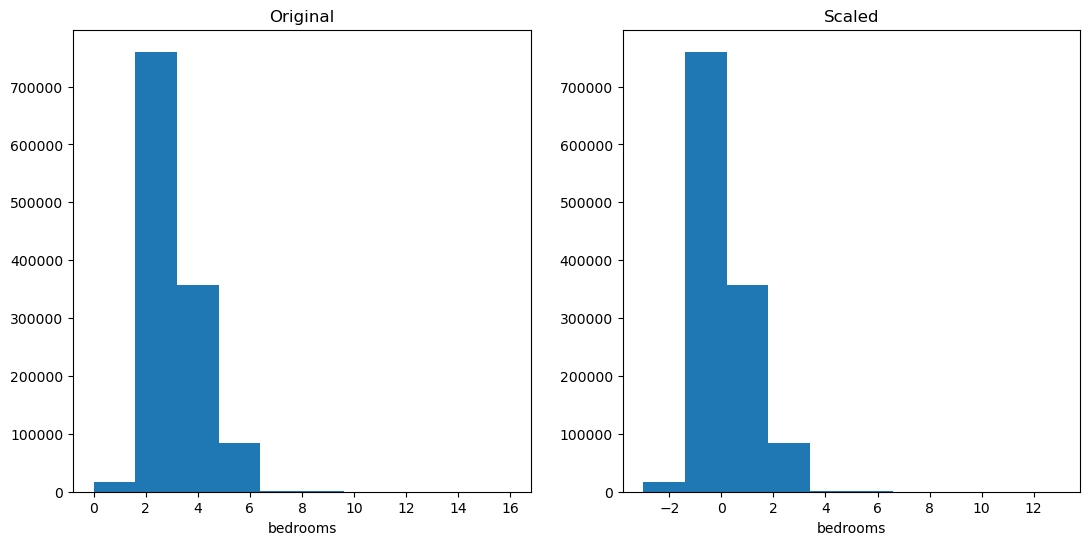

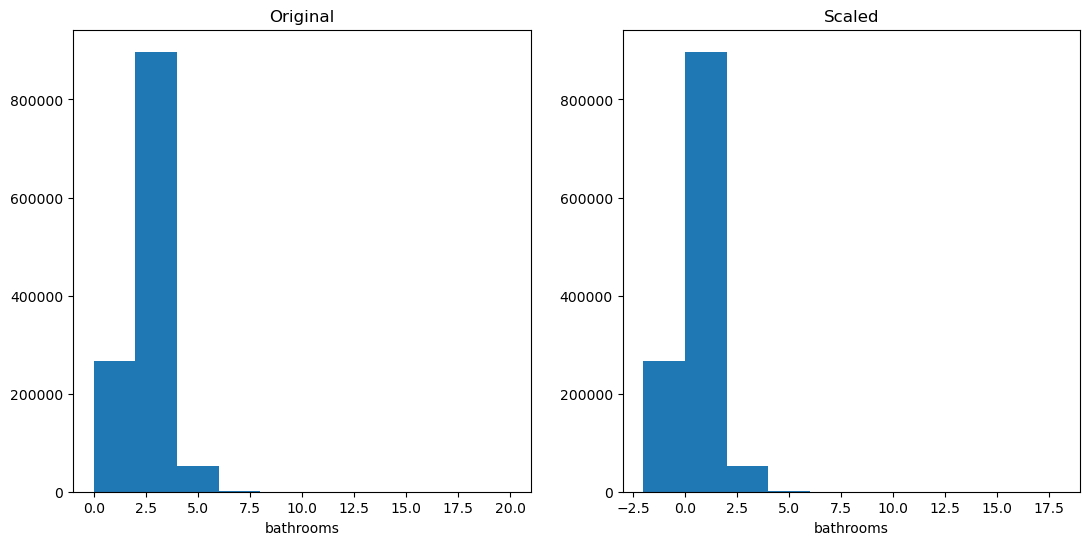

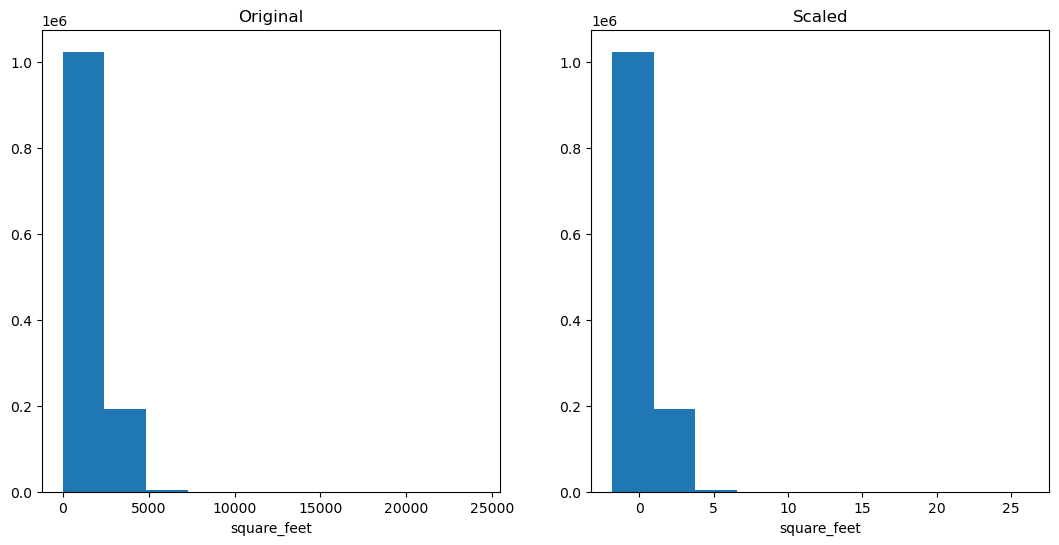

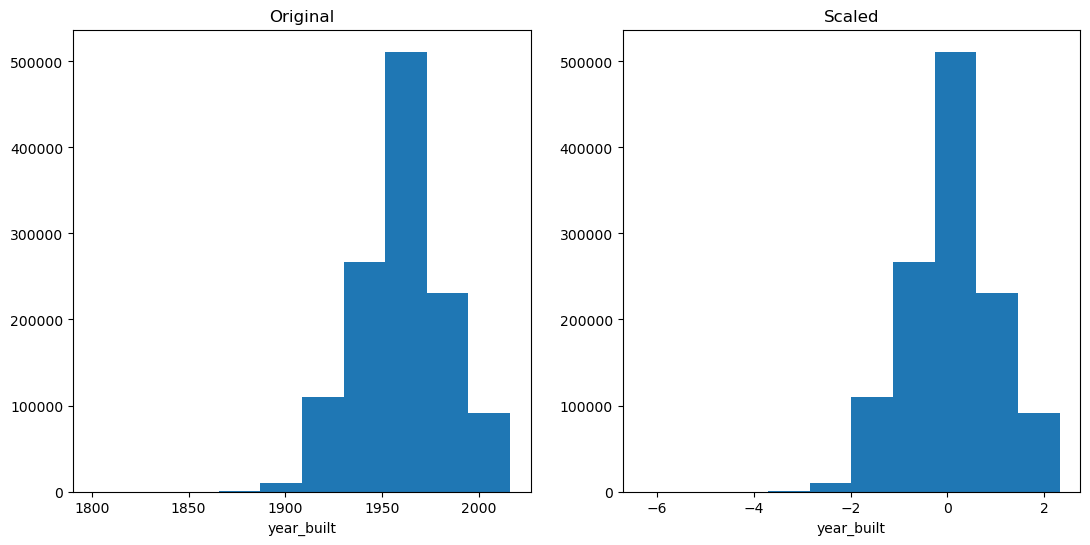

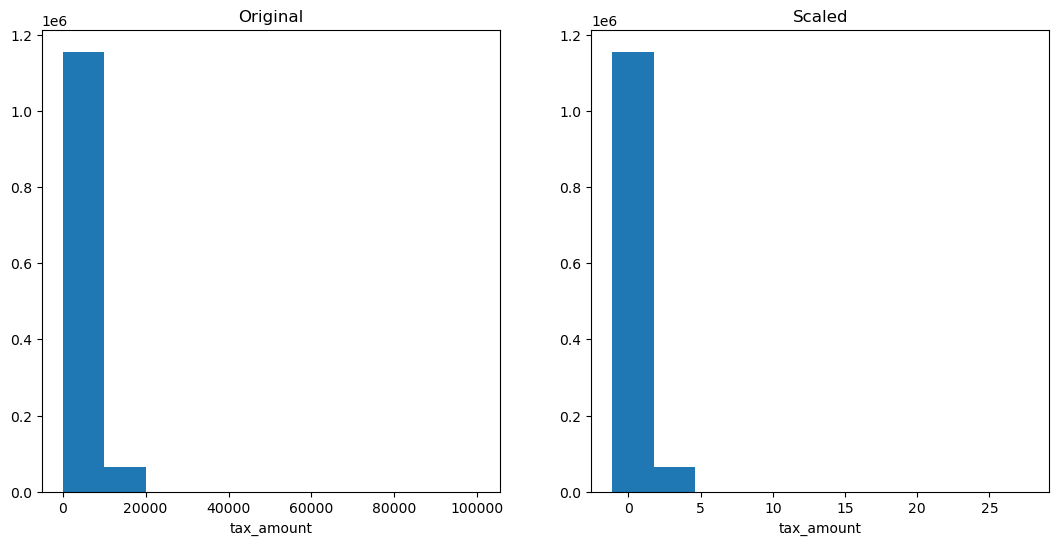

In [103]:
get_scaled_visuals(X_train[columns_to_scale], X_train_scaled)

# 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?
## Answer: Looks very similar except all data types are now floats

In [113]:
# looking at .inverse_transform; 
# first need to get a scaler and scale data (previously this is all done inside functions)

# set columns
cols = ['bedrooms', 'bathrooms', 'square_feet', 'year_built', 'tax_amount']

# make and fit minmax scaler
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(X_train[cols])

# initialize scaled dataframes
X_train_scaled = pd.DataFrame(columns=cols)
X_validate_scaled = pd.DataFrame(columns=cols)
X_test_scaled = pd.DataFrame(columns=cols)

X_train_scaled[cols] = scaler.transform(X_train[cols]).copy()
X_validate_scaled[cols] = scaler.transform(X_validate[cols]).copy()
X_test_scaled[cols] = scaler.transform(X_test[cols]).copy()

In [114]:
X_train.head()

,bedrooms,bathrooms,square_feet,year_built,tax_amount,county_Orange,county_Ventura
789918,2,1,777,1946,4230,0,0
1696225,2,1,1014,1938,2567,0,0
1720742,3,2,1762,1958,5566,1,0
962447,1,1,616,1952,1694,0,0
324076,3,2,1495,1954,1064,0,0


In [115]:
X_train_scaled.head()

,bedrooms,bathrooms,square_feet,year_built,tax_amount
0,-1.0,-1.0,-0.937500,-0.48,0.084458
1,-1.0,-1.0,-0.663194,-0.80,-0.393278
2,0.0,0.0,0.202546,0.00,0.468256
3,-2.0,-1.0,-1.123843,-0.24,-0.644068
4,0.0,0.0,-0.106481,-0.16,-0.825050


In [119]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219902 entries, 0 to 1219901
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bedrooms     1219902 non-null  float64
 1   bathrooms    1219902 non-null  float64
 2   square_feet  1219902 non-null  float64
 3   year_built   1219902 non-null  float64
 4   tax_amount   1219902 non-null  float64
dtypes: float64(5)
memory usage: 46.5 MB


In [116]:
inverse_df = pd.DataFrame(columns=cols)
inverse_df[cols] = scaler.inverse_transform(X_train_scaled)

In [117]:
inverse_df.head()

,bedrooms,bathrooms,square_feet,year_built,tax_amount
0,2.0,1.0,777.0,1946.0,4230.0
1,2.0,1.0,1014.0,1938.0,2567.0
2,3.0,2.0,1762.0,1958.0,5566.0
3,1.0,1.0,616.0,1952.0,1694.0
4,3.0,2.0,1495.0,1954.0,1064.0


In [118]:
inverse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219902 entries, 0 to 1219901
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bedrooms     1219902 non-null  float64
 1   bathrooms    1219902 non-null  float64
 2   square_feet  1219902 non-null  float64
 3   year_built   1219902 non-null  float64
 4   tax_amount   1219902 non-null  float64
dtypes: float64(5)
memory usage: 46.5 MB


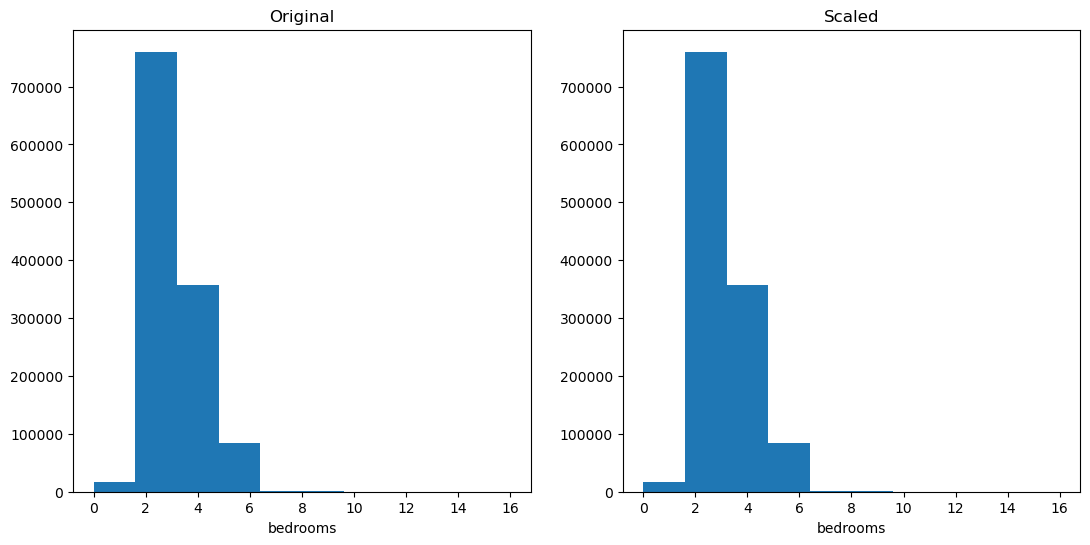

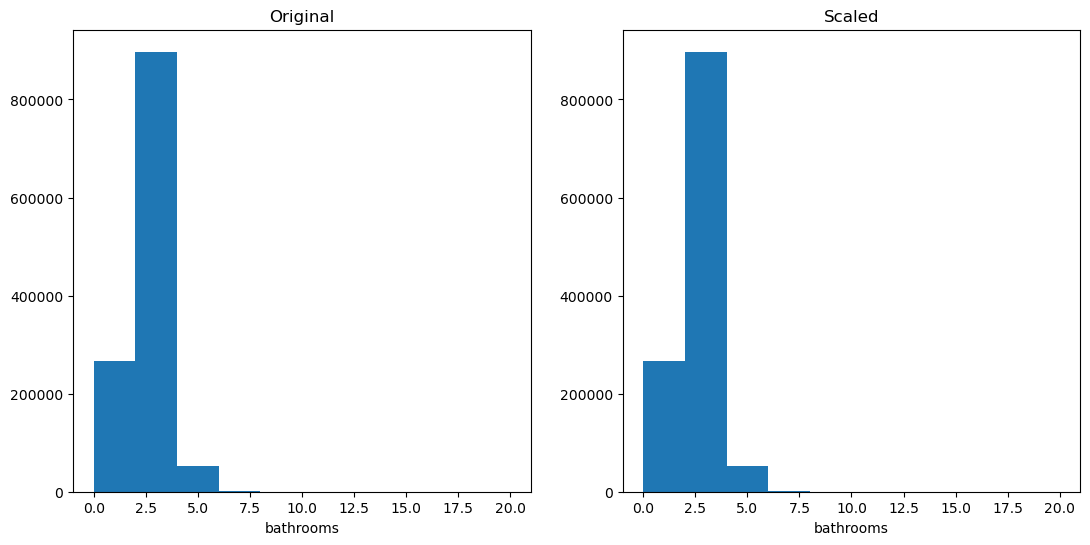

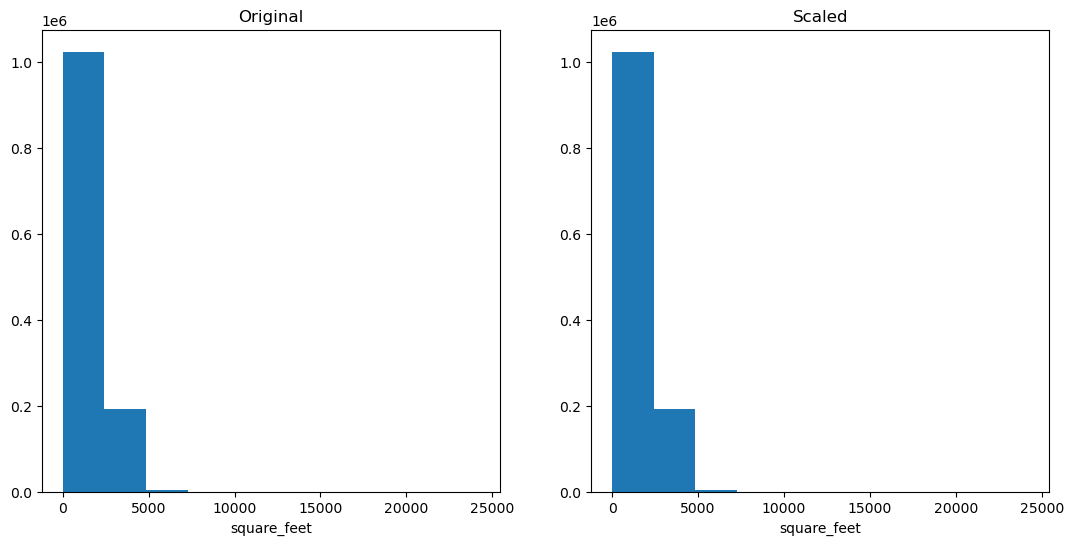

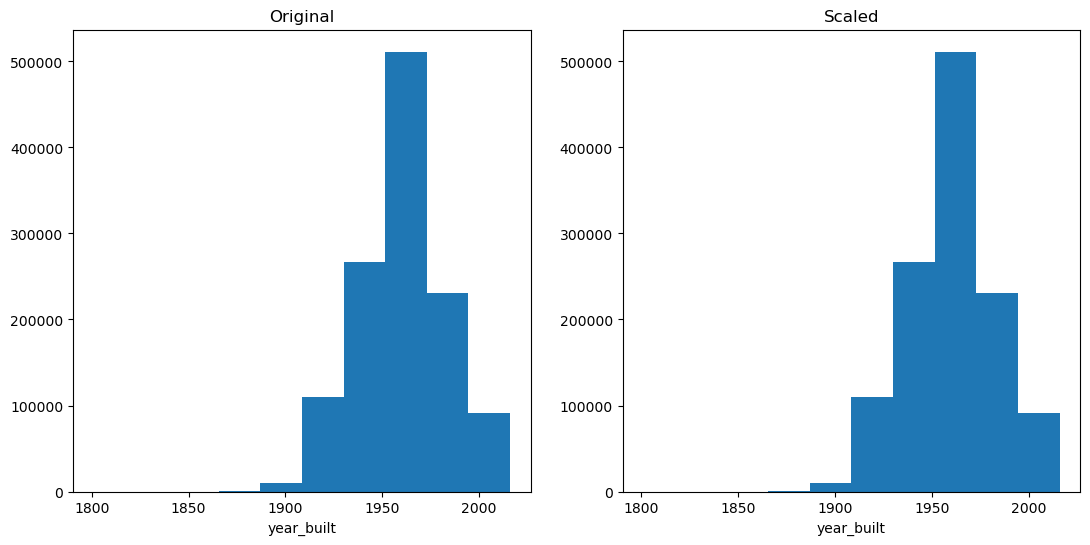

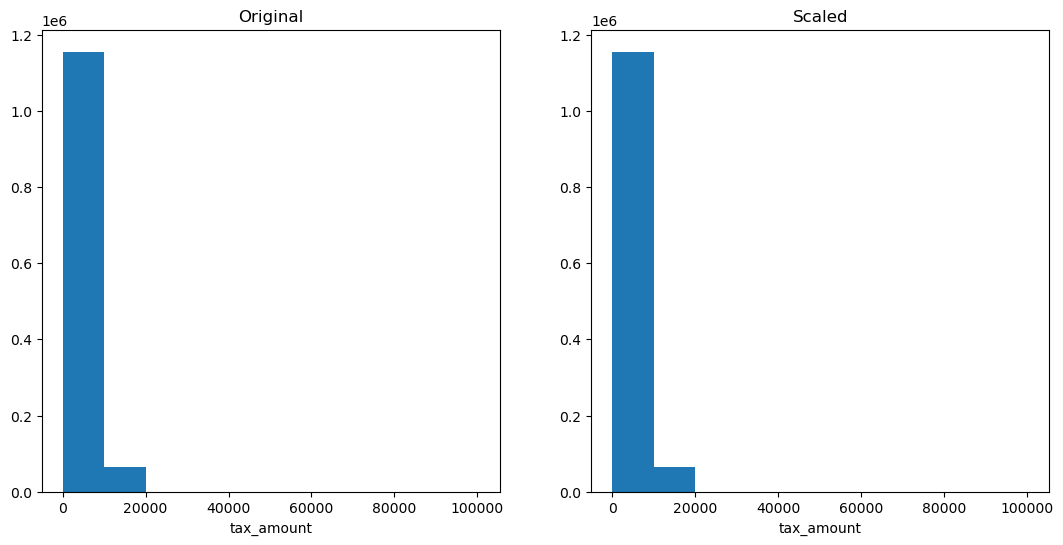

In [120]:
get_scaled_visuals(X_train[columns_to_scale], inverse_df)

# 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the ouput_distribution and apply this scaler to your data. Visualize the result of your data scaling.

# 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

## I didn't notice much. (Makes me wonder if I did it right.)

In [121]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

In [122]:
scaler.fit(X_train[cols])

QuantileTransformer()

In [123]:
# set columns
cols = ['bedrooms', 'bathrooms', 'square_feet', 'year_built', 'tax_amount']

# initialize scaled dataframes
X_train_scaled = pd.DataFrame(columns=cols)
X_validate_scaled = pd.DataFrame(columns=cols)
X_test_scaled = pd.DataFrame(columns=cols)

X_train_scaled[cols] = scaler.transform(X_train[cols]).copy()
X_validate_scaled[cols] = scaler.transform(X_validate[cols]).copy()
X_test_scaled[cols] = scaler.transform(X_test[cols]).copy()

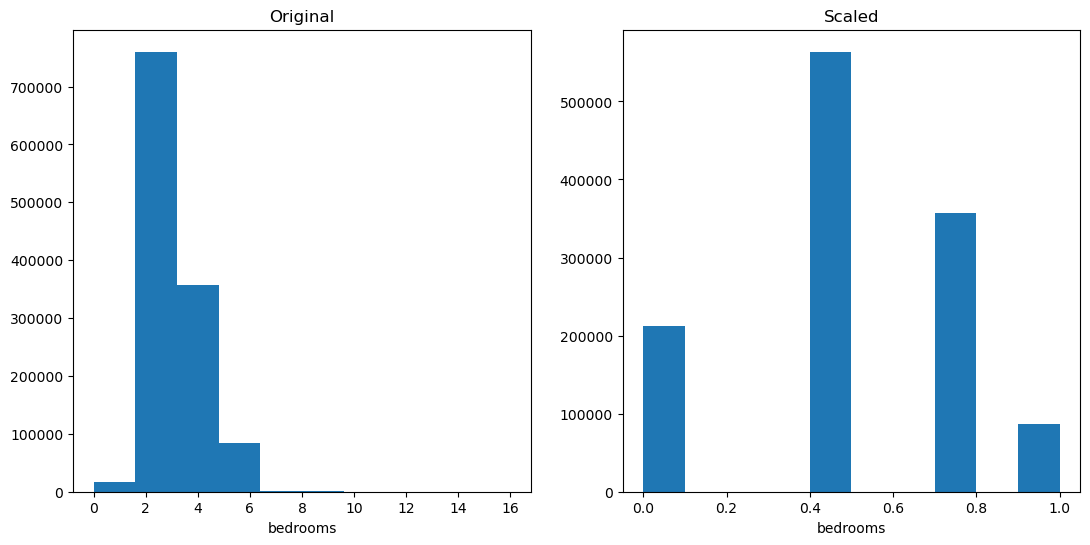

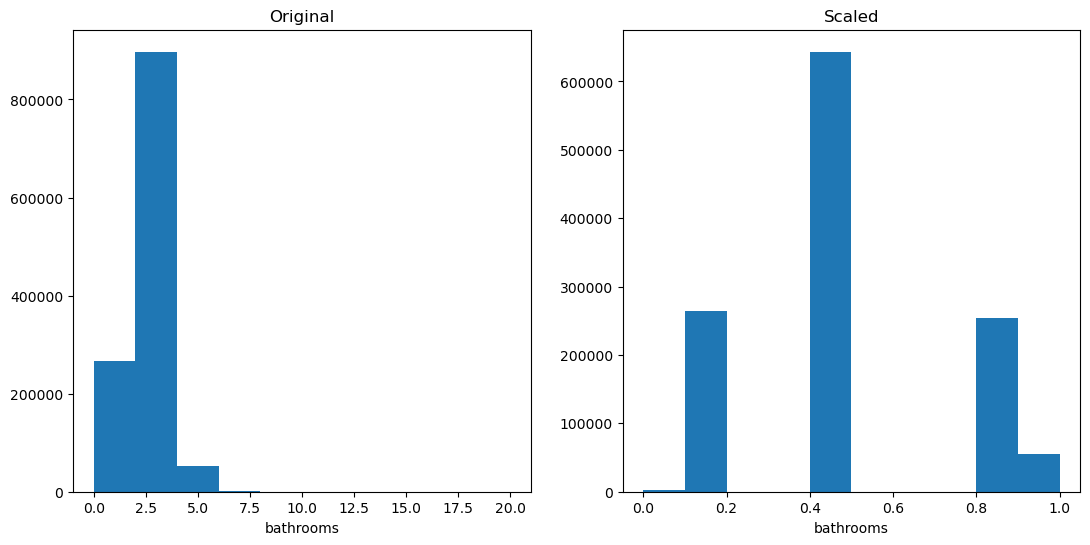

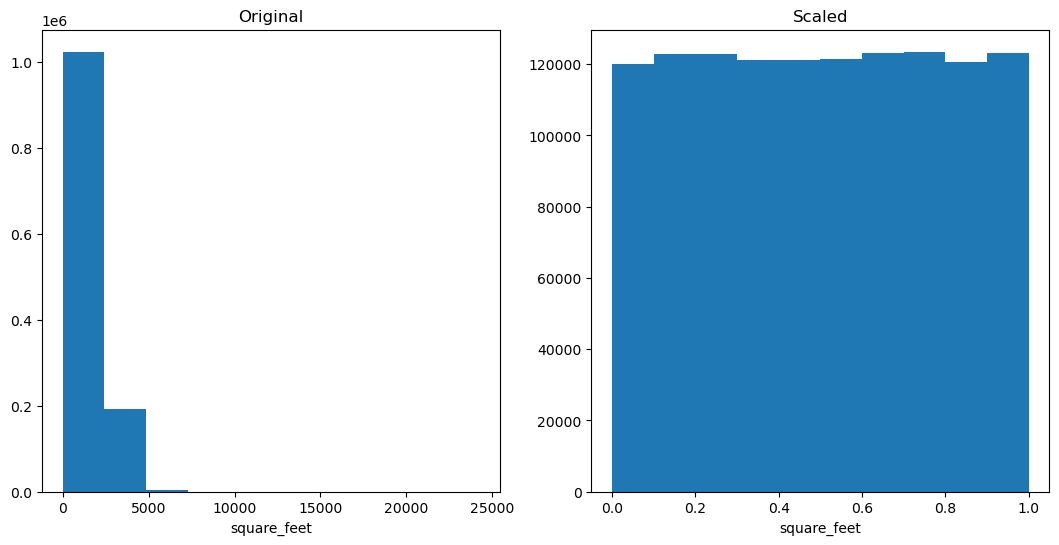

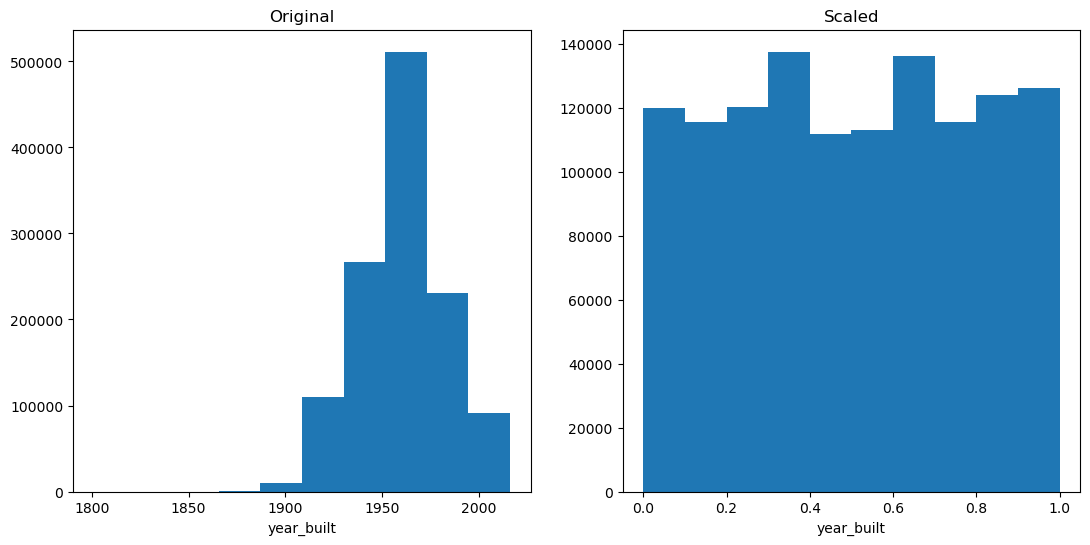

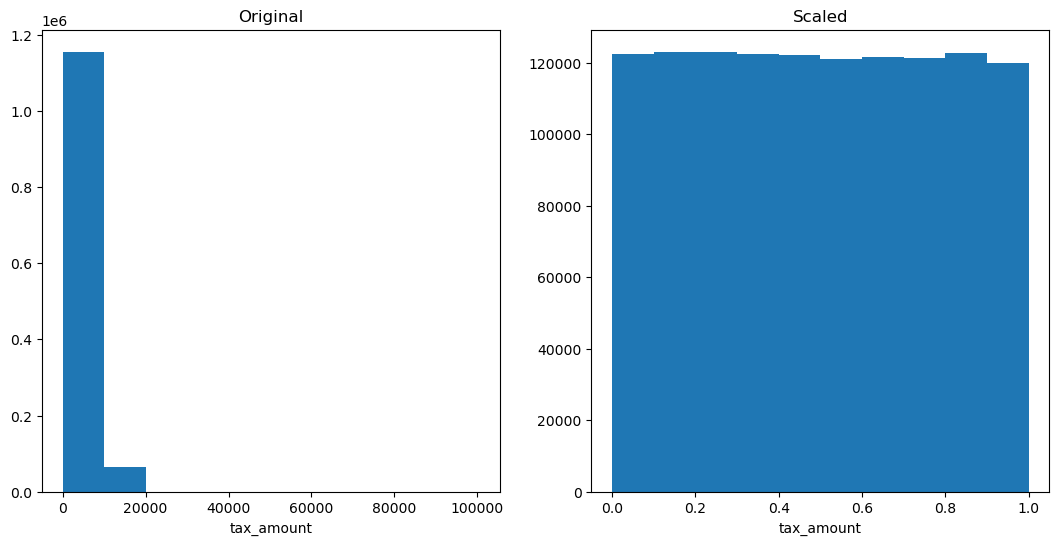

In [124]:
get_scaled_visuals(X_train[cols], X_train_scaled)

In [125]:
X_train_scaled.describe()

,bedrooms,bathrooms,square_feet,year_built,tax_amount
count,1.219902e+06,1.219902e+06,1.219902e+06,1.219902e+06,1.219902e+06
mean,4.998665e-01,4.995288e-01,5.007541e-01,5.001558e-01,4.984626e-01
std,2.692676e-01,2.632779e-01,2.886688e-01,2.881607e-01,2.885678e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.054054e-01,4.819820e-01,2.507508e-01,2.477477e-01,2.486772e-01
50%,4.054054e-01,4.819820e-01,5.010010e-01,5.050050e-01,4.974975e-01
75%,7.822823e-01,8.493493e-01,7.497497e-01,7.512513e-01,7.494736e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [126]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='uniform')
scaler.fit(X_train[cols])

QuantileTransformer()

In [127]:
# set columns
cols = ['bedrooms', 'bathrooms', 'square_feet', 'year_built', 'tax_amount']

# initialize scaled dataframes
X_train_scaled = pd.DataFrame(columns=cols)
X_validate_scaled = pd.DataFrame(columns=cols)
X_test_scaled = pd.DataFrame(columns=cols)

X_train_scaled[cols] = scaler.transform(X_train[cols]).copy()
X_validate_scaled[cols] = scaler.transform(X_validate[cols]).copy()
X_test_scaled[cols] = scaler.transform(X_test[cols]).copy()

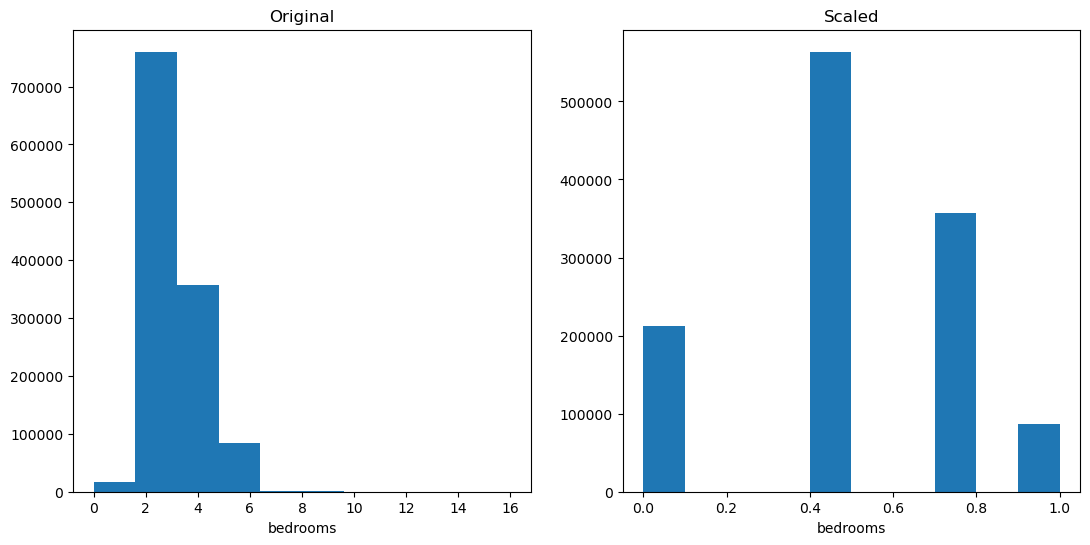

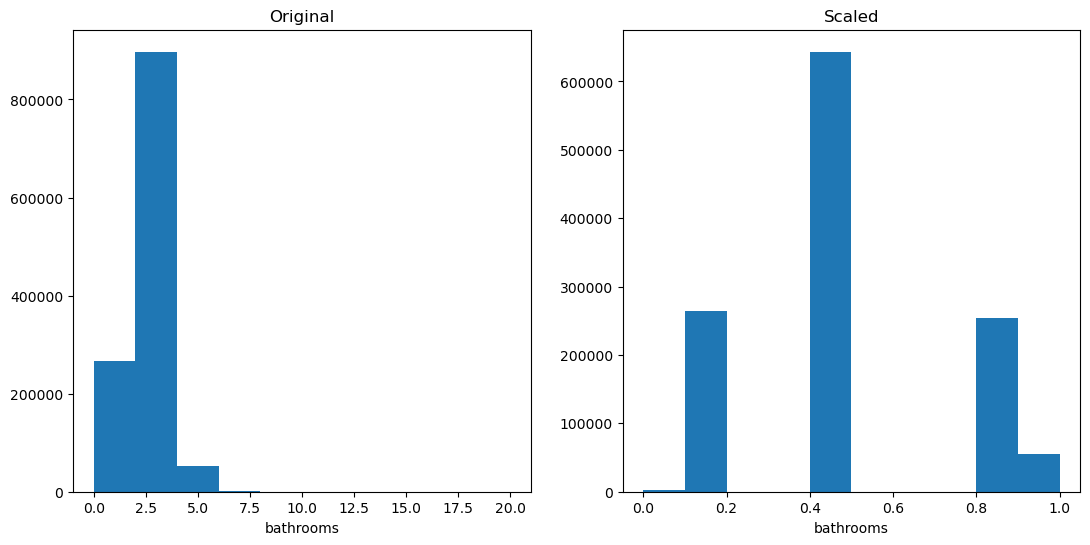

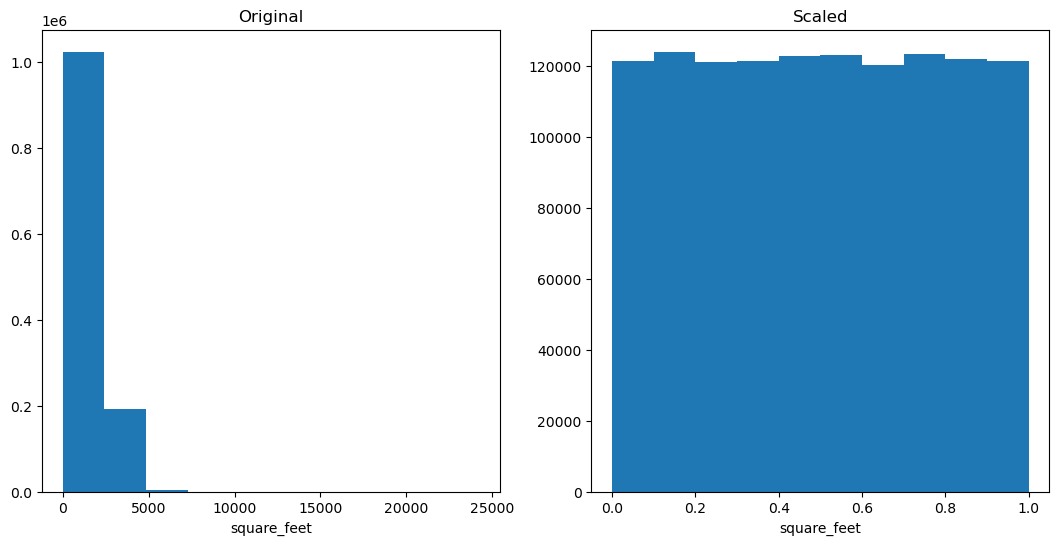

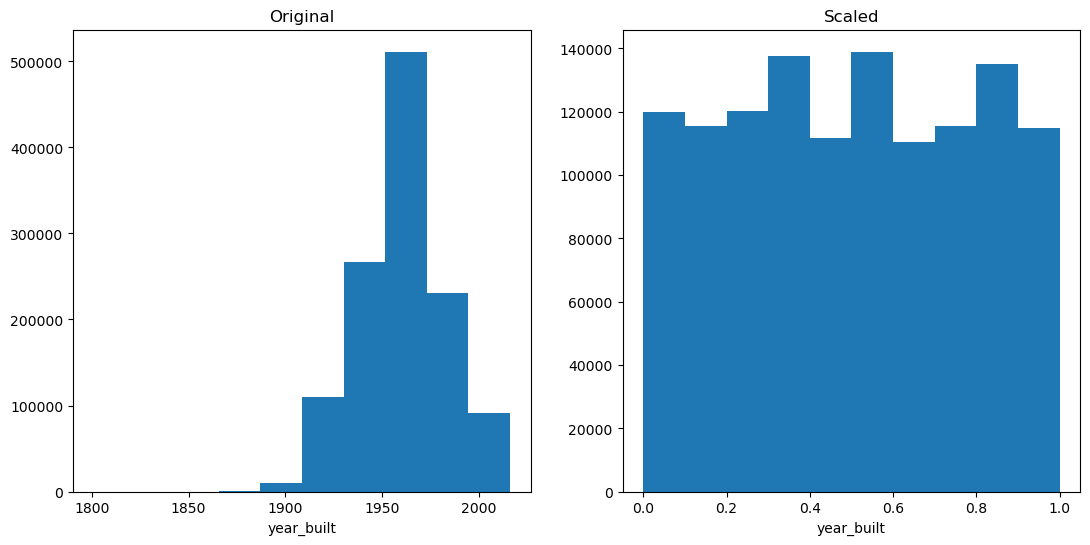

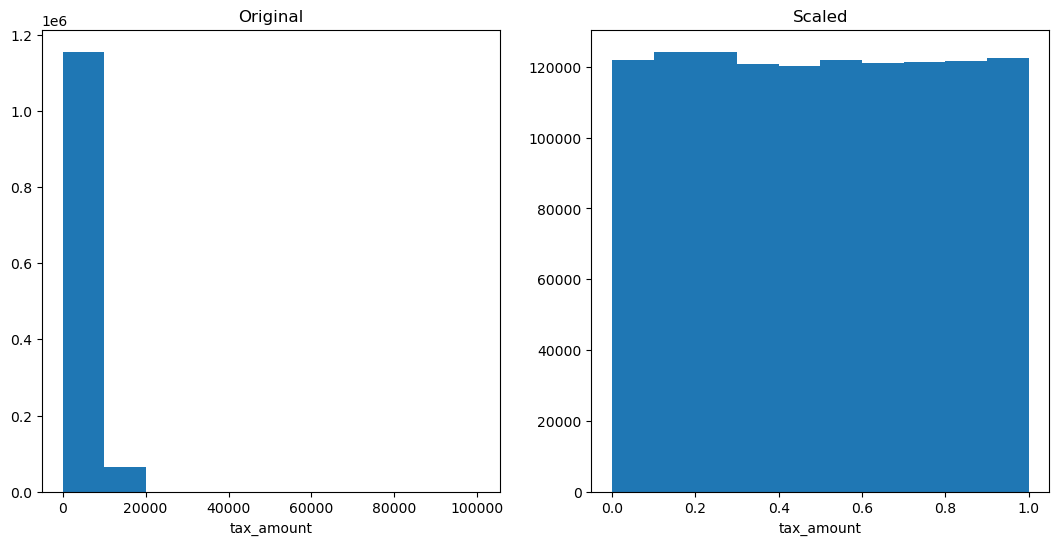

In [128]:
get_scaled_visuals(X_train[cols], X_train_scaled)

# Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

## I think RobustScaler looks good.

In [131]:
df = w.wrangle_zillow()
train, validate, test = w.split_function(df)

csv file found and read
Prepared df: (2033172, 7)

Train: (1219902, 7)
Validate: (406635, 7)
Test: (406635, 7)


In [130]:
train.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,county
789918,2,1,777,350556,1946,4230,LA
1696225,2,1,1014,192599,1938,2567,LA
1720742,3,2,1762,480000,1958,5566,Orange
962447,1,1,616,131512,1952,1694,LA
324076,3,2,1495,84031,1954,1064,LA


In [ ]:
def get_zillow_scaled(train, validate, test, target='tax_value'):
    """
    This function will
    - accept train, validate, test
    - make a RobustScaler
    - fit that scaler to train
    - use it to scale train/validate/test
    - return train validate test ready for modeling
    """
    
    # first get dummy columns for county (our one categorical variable)
    dummy_df = pd.get_dummies(train[['county']], drop_first=True)
    train = pd.concat([train, dummy_df], axis=1)
    train = train.drop(columns=['county'])
    
    dummy_df = pd.get_dummies(validate[['county']], drop_first=True)
    validate = pd.concat([validate, dummy_df], axis=1)
    validate = validate.drop(columns=['county'])
    
    dummy_df = pd.get_dummies(test[['county']], drop_first=True)
    test = pd.concat([test, dummy_df], axis=1)
    test = test.drop(columns=['county'])    
    
    # set columns to scale
    columns = ['bedrooms', 'bathrooms', 'square_feet', 'year_built', 'tax_amount']
    
    